# I-94 TRAFFIC DATASET

[Dataset url](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  
[More information](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)  


## Attribute information:
- holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
- temp Numeric Average temp in kelvin
- rain_1h Numeric Amount in mm of rain that occurred in the hour
- snow_1h Numeric Amount in mm of snow that occurred in the hour
- clouds_all Numeric Percentage of cloud cover
- weather_main Categorical Short textual description of the current weather
- weather_description Categorical Longer textual description of the current weather
- date_time DateTime Hour of the data collected in local CST time
- traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
import pandas as pd
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# Examine the first five rows
print(traffic.head())

# Examine the last five rows
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [2]:
# Information
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48204 rows and 9 columns  
There is no null values at all  
Time period: from 2012-10-02 09:00:00 to 2018-09-30 23:00:00

# Analysis Interstate-94 traffic volume

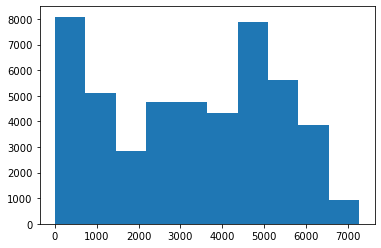

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(traffic['traffic_volume'])
plt.show()

In [17]:
# a few statistics about the traffic_volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

- The traffic volume ranges from 0 to 7280 cars with an average of 3259.8
- Because mean and 50% are almost equal so, **in one day, the amount of traffic at peak times can be 4 times higher than normal**

# Analysis The traffic volume over time

In [4]:
# Transform the date_time column to datetime
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [5]:
import datetime as dt

traffic['hour'] = traffic['date_time'].dt.hour
traffic['month'] = traffic['date_time'].dt.month
traffic['year'] = traffic['date_time'].dt.year
traffic['day_of_week'] = traffic['date_time'].dt.day_of_week

- 4 new columns are added by splitting information of the date_time column

In [6]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int64         
 10  month                48204 non-null  int64         
 11  year                 48204 non-null  int64         
 12  day_of_week          48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3

- Let divide the dataset by day and night, each part lasts 12 hours:
    - daytime starts from 7 a.m to 6 p.m
    - nighttime starts from 7 p.m to 6 a.m of next day

In [8]:
traffic_day = traffic.loc[(traffic['hour'] >= 7) & (traffic['hour'] <= 18)]
traffic_night = traffic.loc[(traffic['hour'] >=  19) | (traffic['hour'] <= 6)]

In [12]:
print("Shape of daytime dataset:", traffic_day.shape)
print("Shape of nighttiem dataset:",traffic_night.shape)

Shape of daytime dataset: (23877, 13)
Shape of nighttiem dataset: (24327, 13)


- The number of rows of the two dataframe is not equal. This is unusual because both of dataset has 12 hours.
- **Maybe some data is missing**

In [14]:
traffic_day['hour'].value_counts()

8     2080
7     2079
10    2078
9     2018
16    1988
18    1986
14    1969
12    1955
11    1952
15    1934
17    1933
13    1905
Name: hour, dtype: int64

- In daytime dataset, data every hour is not equal. Data at 13:00 is missing the most.

In [15]:
traffic_night['hour'].value_counts()

4     2091
6     2087
5     2063
1     2049
23    2040
0     2037
3     2025
2     2019
22    1994
21    1982
20    1979
19    1961
Name: hour, dtype: int64

- In nighttime dataset, data every hour is also not equal, but the difference is lower. Data at 19:00 is missing the most.

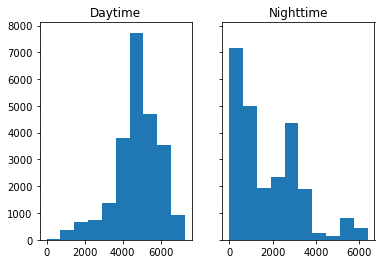

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
ax1.set_title('Daytime')
ax2.set_title('Nighttime')
ax1.hist(traffic_day['traffic_volume'])
ax2.hist(traffic_night['traffic_volume'])
plt.show()

- Daytime traffic is higher than nighttime. Regularly reaching the milestone of approximately 5.000 cars
- Nighttime traffic usually has less than 1.000 - 1.500 cars on the road

In [21]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [20]:
traffic_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

- Focus on values of 25%, 50%, and 75% of both dataset:
    - In daytime, the traffic volume is distributed fairly evenly for all hours. That is, there is always an equal number of cars on the road
    - In nighttime, the traffic volumn is distributed is unevenly. There are sudden changes at times

# Analysis traffic volume per time units

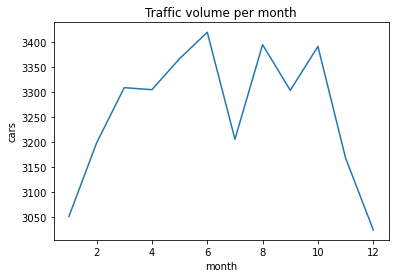

In [24]:
by_month = traffic.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.title('Traffic volume per month')
plt.ylabel('cars')
plt.show()

- There was a sudden decrease in vehicle traffic starting in July. 
- **Focusing on the data analysis for the month of July.**

In [25]:
traffic_july = traffic[traffic['month'] == 7]

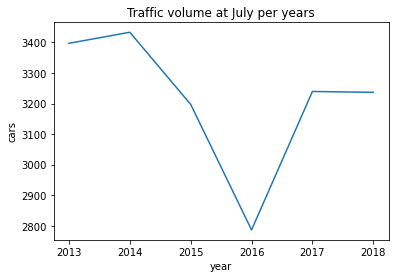

In [29]:
traffic_july_year = traffic_july.groupby('year').mean()
traffic_july_year['traffic_volume'].plot.line()
plt.title("Traffic volume at July per years")
plt.ylabel("cars")
plt.show()

- The number of cars decreased sharply in 2016
- Next step is to focus on 2016 data

C:\Users\dpn\AppData\Local\Temp\ipykernel_3616\4186813776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_july_2016['day'] = traffic_july_2016['date_time'].dt.day


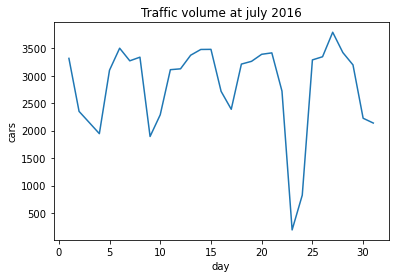

In [33]:
traffic_july_2016 = traffic_july[traffic_july['year'] == 2016]
traffic_july_2016['day'] = traffic_july_2016['date_time'].dt.day
traffic_july_2016_day = traffic_july_2016.groupby('day').mean()
traffic_july_2016_day['traffic_volume'].plot.line()
plt.title("Traffic volume at july 2016")
plt.ylabel("cars")
plt.show()

- The number of vehicles decreased sharply from the 20th to the 25th, even drop to 0
- Something happened at this time that prevented vehicles from entering
- Find out more external information, the road was repaired at that time

# Analysis traffic volume per day of the week

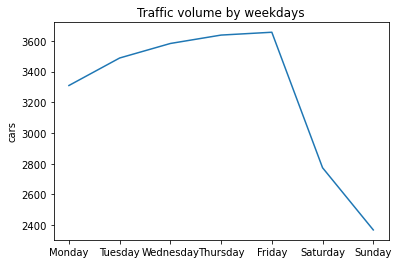

In [37]:
traffic_day_of_week = traffic.groupby('day_of_week').mean()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.plot(weekday, traffic_day_of_week['traffic_volume'])
plt.title("Traffic volume by weekdays")
plt.ylabel("cars")
plt.show()

- The number of vehicles gradually increased from Monday and peaked on Friday
- The number of cars drops sharply on weekends

In [45]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,month,year,day_of_week
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,10,2012,1
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,10,2012,1
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,10,2012,1
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,10,2012,1
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,10,2012,1


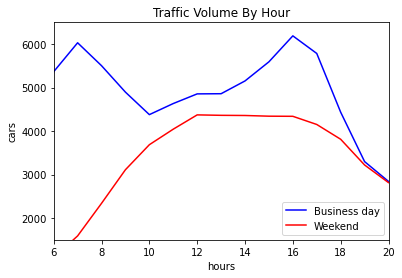

In [59]:
bussiness_days = traffic[traffic['day_of_week'] <= 4] # 4 == Friday
weekend = traffic[traffic['day_of_week'] >= 5] # 5 = Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

hours = list(range(0,24))

plt.plot(hours,by_hour_business['traffic_volume'], label = "Business day", color = "blue")
plt.plot(hours,by_hour_weekend['traffic_volume'], label = "Weekend", color = "red")

plt.legend()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.xlabel("hours")
plt.ylabel("cars")
plt.title('Traffic Volume By Hour')

plt.show()

- Traffic increases sharply on working days and gradually decreases on weekends
- During the weekend, the traffic volume increases sharply at commuting and off-hours
- During the weekend, the traffic volume increases gradually at noon when people go out